In [21]:
#20142776 JinsolHa
#https://github.com/JinsolHa/assignment01

import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import signal, fftpack
from skimage import io, color
from skimage import exposure

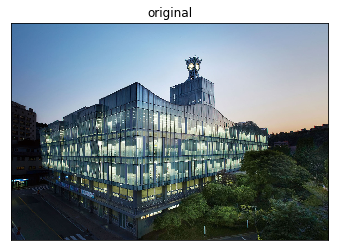

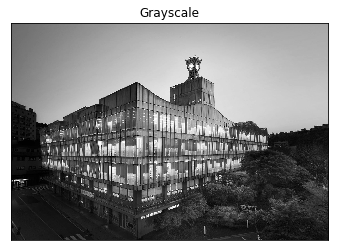

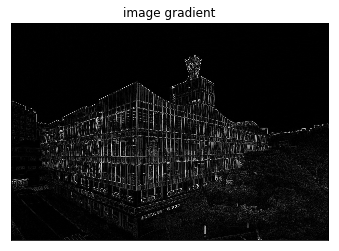

In [23]:
def sobel_filter(im, k_size):

    im = im.astype(np.float)
    width, height, c = im.shape
    if c > 1:
        # grayscale image
        img = 0.2126 * im[:,:,0] + 0.7152 * im[:,:,1] + 0.0722 * im[:,:,2]
    else:
        img = im
        
    plt.figure()
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title('Grayscale'), plt.xticks([]), plt.yticks([])
    

    assert(k_size == 3 or k_size == 5);

    if k_size == 3:
        kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
        kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)
    else:
        kh = np.array([[-1, -2, 0, 2, 1], 
                   [-4, -8, 0, 8, 4], 
                   [-6, -12, 0, 12, 6],
                   [-4, -8, 0, 8, 4],
                   [-1, -2, 0, 2, 1]], dtype = np.float)
        kv = np.array([[1, 4, 6, 4, 1], 
                   [2, 8, 12, 8, 2],
                   [0, 0, 0, 0, 0], 
                   [-2, -8, -12, -8, -2],
                   [-1, -4, -6, -4, -1]], dtype = np.float)
    
    #derivative x, y
    gx = signal.convolve2d(img, kh, mode='same', boundary = 'symm', fillvalue=0)
    gy = signal.convolve2d(img, kv, mode='same', boundary = 'symm', fillvalue=0)
    
    #magnitude
    g = np.sqrt(gx * gx + gy * gy)
    
    #normalize
    g *= 255.0 / np.max(g)

    plt.figure()
    plt.imshow(g, cmap=plt.cm.gray)
    plt.title('image gradient'), plt.xticks([]), plt.yticks([])
    
    plt.show()

def grad():
    
    #input color image
    orimg = io.imread('cau.jpg')

    plt.imshow(orimg, cmap='gray')
    plt.title('original'), plt.xticks([]), plt.yticks([])
    
    sobel = sobel_filter(orimg, 3)

    plt.show()
    
grad()

(<matplotlib.image.AxesImage at 0x1deabcb9630>,
 Text(0.5,1,'Image Blurring'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

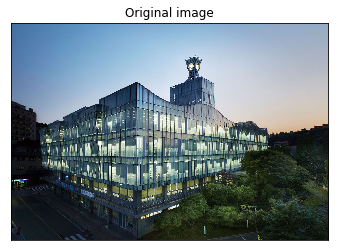

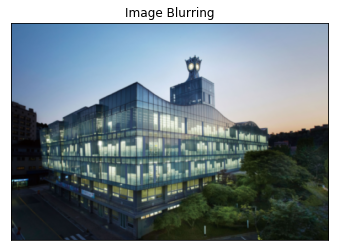

In [39]:
orimg = io.imread('cau.jpg')

plt.figure()
plt.imshow(orimg) 
plt.title('Original image'), plt.xticks([]), plt.yticks([])

image = orimg/255

#1-D  Gaussian
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

#2-D kernel
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

img3 = signal.fftconvolve(image, kernel[:, :, np.newaxis], mode='same')

plt.figure()
plt.imshow(img3), plt.title('Image Blurring'), plt.xticks([]), plt.yticks([])